# Brain Stroke Analysis

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import SCORERS, roc_auc_score, f1_score ## previously sklearn.metrics.scorer
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

About Dataset

* **id:** Unique identifier
* **gender:** Gender of the patient (Male, Female, Other)
* **age:** Age of the patient
* **hypertension:** **0** if the patient doesn't have hypertension, **1** if the patient has hypertension
* **heart_disease:** **0** if the patient doesn't have any heart diseases, **1** if the patient has a heart disease
* **ever_married:** **Yes** if the patient is married, **No** if the patient is not married 
* **work_type:** Profession of the patient (children, Govt_job, Never_worked, Private, Self-employed)
* **Residence_type:** Residence category of the patient (Rural, Urban)
* **avg_glucose_level:** Average glucose level in blood of the patient
* **bmi:** Body Mass Index of the patient
* **smoking_status:** Smoking status of the patient (formerly smoked, never smoked, smokes, Unknown). **Unknown** in **smoking_status** means that the information is unavailable for this patient
* **stroke:** **1** if the patient had a stroke or **0** if not


In [2]:
#read data file
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Check the size/shape dataset
print("Shape of dataset: ",data.shape)


Shape of dataset:  (5110, 12)


In [4]:
# Summary of dataset
round(data.describe(),3)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000


In [5]:
data.describe(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
# Check for duplicated data
data.duplicated().any()


False

In [7]:
# Check for missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**No duplicate** values exist within this dataframe. Nonetheless, the **bmi column is missing 201 values.**

# Data Preprocessing

In [8]:
# Drop missing values
data.dropna(axis = 0, inplace = True) # axis = 0, dropping column

In [9]:
# Check for missing values again
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# Check the size of dataset
data.shape

(4909, 12)

After removing missing values, the size of the dataset was **reduced to 4909**

*Have a look at the cleaned dataset*


In [11]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [14]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [15]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
# Remove 'Other' from column gender
data = data[data['gender'] != 'Other']

# Replace 0 with no, 1 with yes
data['hypertension'].replace({0: 'No', 1: 'Yes'}, inplace = True)
data['heart_disease'].replace({0: 'No', 1: 'Yes'}, inplace = True)
data['stroke'].replace({0: 'No', 1: 'Yes'}, inplace = True)

# Replace No with Single,  Yes with Married for column ever_married
data['ever_married'].replace({'No' : 'Single', 'Yes' : 'Married'}, inplace = True)

# Replace Self-employed with Self Employed, children with Children, Govt_job with Government Job, Private with Private Job, Never_worked with Unemployed 
data['work_type'].replace({'Self-employed' : 'Self Employed', 'children' : 'Children' , 'Govt_job' : 'Government Job' ,
                          'Private' : 'Private Job' , 'Never_worked' : 'Unemployed'}, inplace = True)

# Replace 'formerly smoked' with Formerly Smoked, 'never smoked' with Never Smoked, 'smokes' with Smoke
data['smoking_status'].replace({'formerly smoked' : 'Formerly Smoked', 'never smoked' : 'Never Smoked', 'smokes' : 'Smokes'}, 
                              inplace = True)

# Rename column
data.rename(columns={"id": "ID", "gender": "Gender","age": "Age","hypertension":"Hypertension","heart_disease":"Heart Disease",
                     "ever_married":"Marital Status","work_type":"Occupation Type","Residence_type":"Residence Type",
                     "avg_glucose_level": "Average Glucose Level","bmi":"BMI","smoking_status":"Smoking Status",
                     "stroke":"Stroke"}, inplace = True)


In [18]:
# Check the dataset after the change had been made
data.head()

,ID,Gender,Age,Hypertension,Heart Disease,Marital Status,Occupation Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,No,Yes,Married,Private Job,Urban,228.69,36.6,Formerly Smoked,Yes
2,31112,Male,80.0,No,Yes,Married,Private Job,Rural,105.92,32.5,Never Smoked,Yes
3,60182,Female,49.0,No,No,Married,Private Job,Urban,171.23,34.4,Smokes,Yes
4,1665,Female,79.0,Yes,No,Married,Self Employed,Rural,174.12,24.0,Never Smoked,Yes
5,56669,Male,81.0,No,No,Married,Private Job,Urban,186.21,29.0,Formerly Smoked,Yes


In [19]:
data.describe()

,ID,Age,Average Glucose Level,BMI
count,4908.000000,4908.000000,4908.000000,4908.00000
mean,37060.423594,42.868810,105.297402,28.89456
std,20995.468407,22.556128,44.425550,7.85432
min,77.000000,0.080000,55.120000,10.30000
25%,18602.500000,25.000000,77.067500,23.50000
50%,37580.500000,44.000000,91.680000,28.10000
75%,55181.750000,60.000000,113.495000,33.10000
max,72940.000000,82.000000,271.740000,97.60000


In [20]:
# Check dataset summary
data.describe(include = 'object').T

,count,unique,top,freq
Gender,4908,2,Female,2897
Hypertension,4908,2,No,4457
Heart Disease,4908,2,No,4665
Marital Status,4908,2,Married,3204
Occupation Type,4908,5,Private Job,2810
Residence Type,4908,2,Urban,2490
Smoking Status,4908,4,Never Smoked,1852
Stroke,4908,2,No,4699


Stroke Patient's Age


Text(0.5, 1.0, "\nStroke Patient's Age Distribution\n")

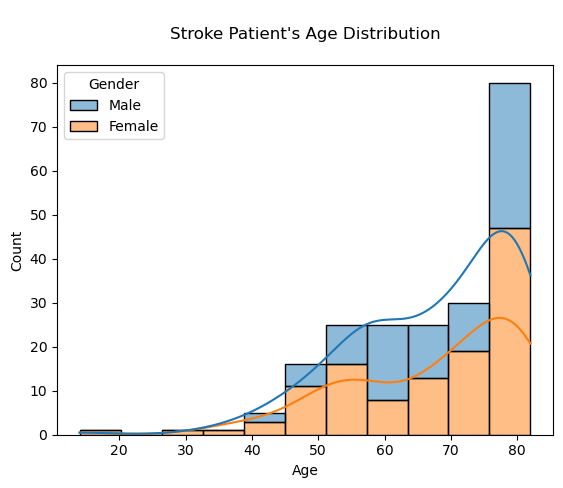

In [21]:
Age_plots = sns.histplot(data = data[data['Stroke'] == 'Yes'], x = 'Age', hue = 'Gender', multiple = 'stack', kde = True) #kde for distribution line
Age_plots.axes.set_title("\nStroke Patient's Age Distribution\n") # Plot title


This chart demonstrates that it is **skewed to the left** and most of the patients fall in between **60 years to 82 years**. Additionally, there is a younger patient with a stroke, although the number is very small.

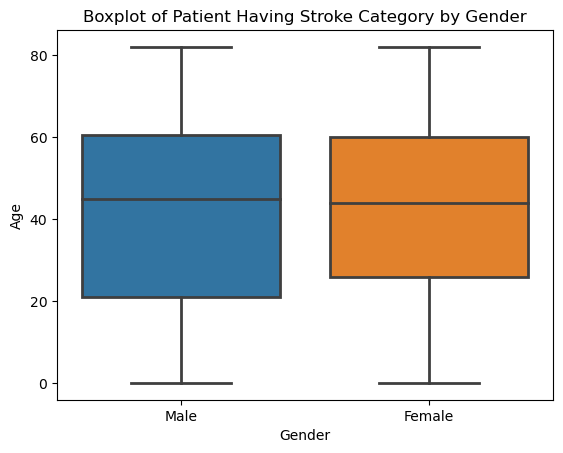

In [22]:
ax = sns.boxplot(data = data[data['Stroke'] == 'Yes'], x = data['Gender'], y =data['Age'],
            linewidth = 2).set(title='Boxplot of Patient Having Stroke Category by Gender')



Total stroke patient's gender :


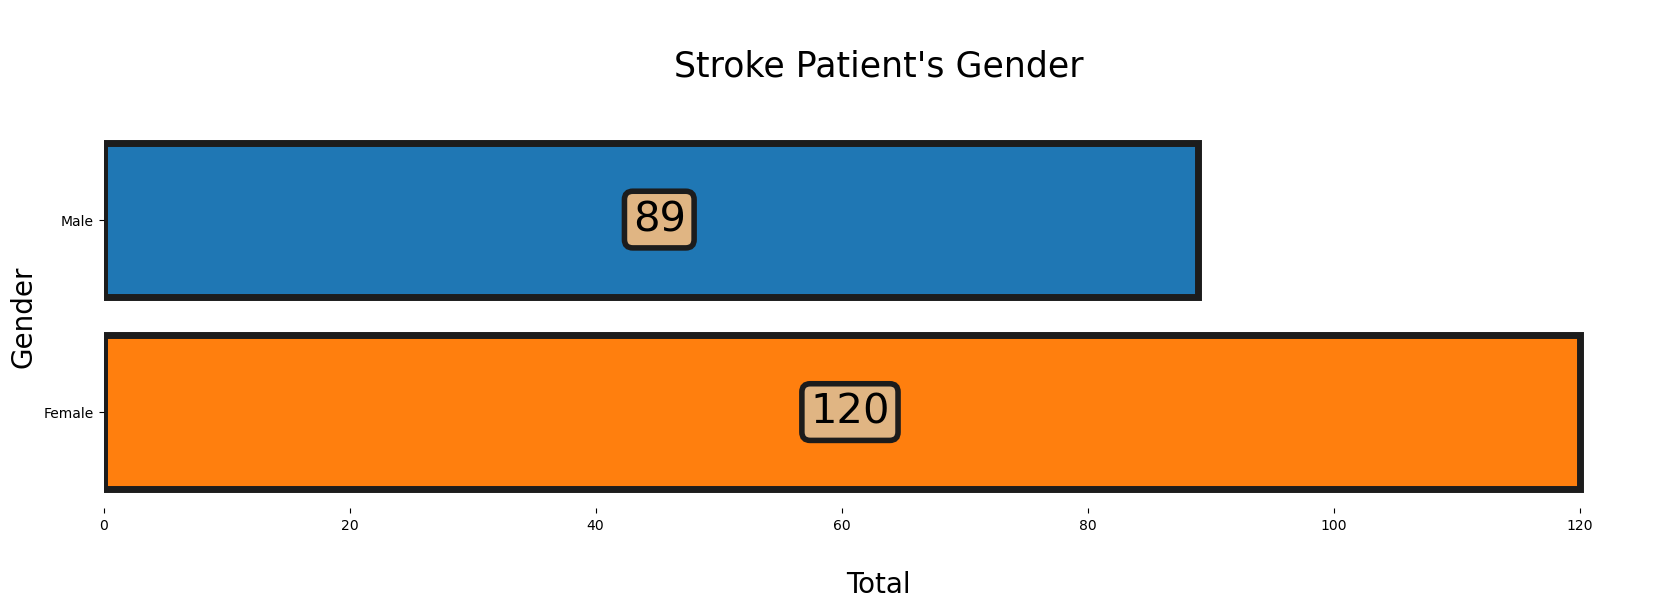

In [23]:
print("Total stroke patient's gender :")
plt.subplots(figsize=(20, 5))
p=sns.countplot(y=data[data["Stroke"]=="Yes"]["Gender"],order=data[data["Stroke"]=="Yes"]["Gender"].value_counts(ascending=True).index, saturation=1, edgecolor = "#1c1c1c", linewidth = 5)

p.axes.set_title("\nStroke Patient's Gender\n",fontsize=25)
p.axes.set_ylabel("Gender",fontsize=20)
p.axes.set_xlabel("\nTotal",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True) # Remove line background
plt.show()

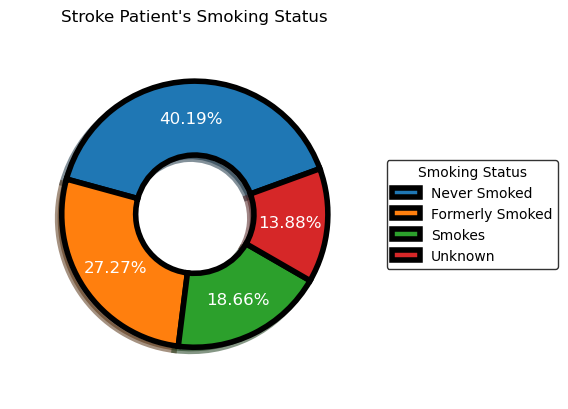

In [24]:
# Stroke Patient's Smkoke status

labels = "Never Smoked", "Formerly Smoked", "Smokes", "Unknown"
size = 0.5

wedges, texts, autotexts = plt.pie(
    [
        
        data[data['Stroke'] == 'Yes']['Smoking Status'].value_counts(ascending=False).values[0],
        data[data['Stroke'] == 'Yes']['Smoking Status'].value_counts(ascending=False).values[1],
        data[data['Stroke'] == 'Yes']['Smoking Status'].value_counts(ascending=False).values[2],
        data[data['Stroke'] == 'Yes']['Smoking Status'].value_counts(ascending=False).values[3]],
    
    explode = (0, 0, 0, 0),
    textprops = dict(size = 12, color = 'white'),
    autopct = '%.2f%%',
    pctdistance = 0.72,
    radius = 0.9,
    shadow = True,
    wedgeprops = dict(width = size, edgecolor = 'black', linewidth = 4),
    startangle = 20)

plt.legend(wedges,labels, title = "Smoking Status", loc = 'center left', bbox_to_anchor = (1, 0, 0.5, 1), edgecolor = 'black')
plt.title("Stroke Patient's Smoking Status")
plt.show()

The majority of stroke patients, **40.19 % had never smoked**, whereas the second-highest proportion, **27.27 %, had previously smoked and quit**. There are patients who choose **not to declare their smoking status**, resulting in a smoking status percentage of **13.88% that is unknown**.

<AxesSubplot:xlabel='BMI', ylabel='Count'>

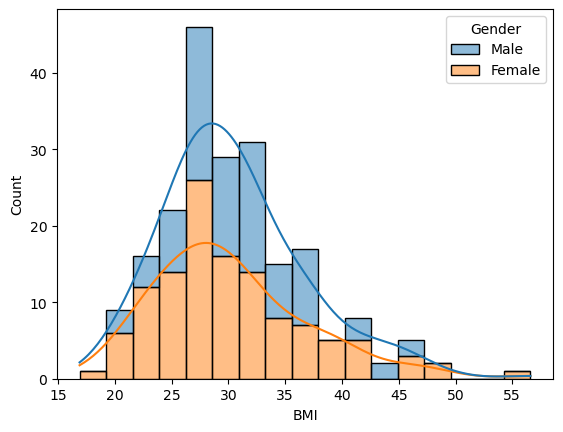

In [25]:
sns.histplot(data = data[data['Stroke'] == 'Yes'], x = 'BMI', hue = 'Gender', multiple = 'stack', kde = True)

In [26]:
#sns.pairplot(data, hue='Hypertension', palette="deep"); #jenis colour je deep ^ husl

The BMI distribution is **skewed to the right**, with the **majority of patients** having a **BMI between 25 and 35**
For BMI that **above 25**, it falls within the **overweight range.**

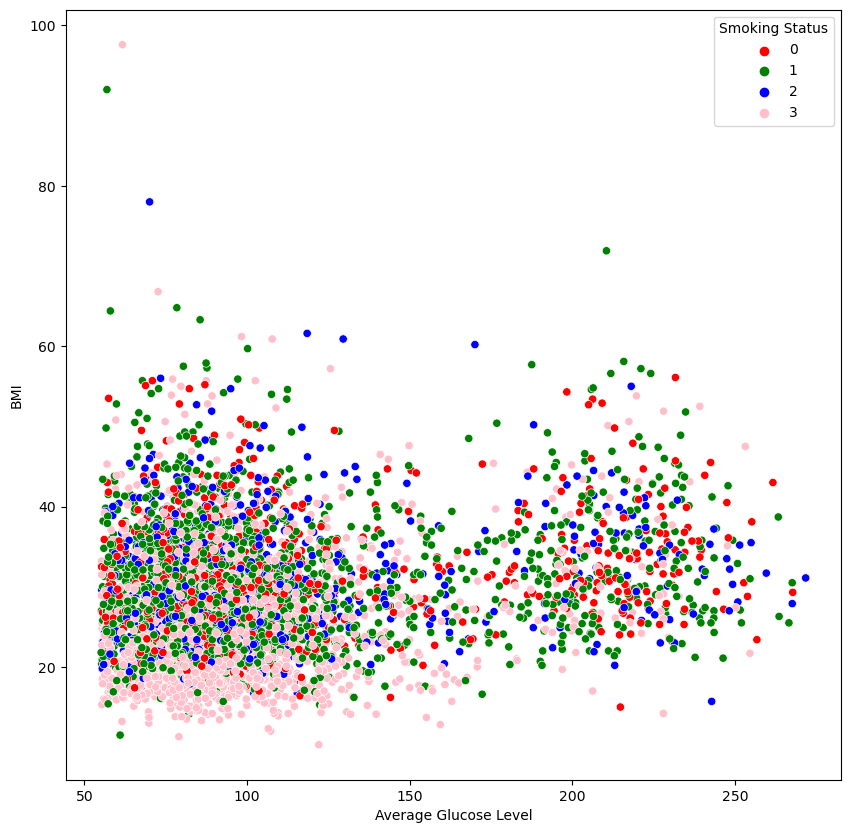

In [42]:
plt.figure( figsize= (10, 10))
ax = sns.scatterplot(x = 'Average Glucose Level', y = 'BMI', hue ='Smoking Status', data =data,
                    palette = ['red','green','blue','pink'])

In [28]:
# Convert Category variable to numericl variable
category_col = [col for col in data.columns if data[col].dtype == "object"]

for col in category_col:
    data[col] = LabelEncoder().fit_transform(data[col])

In [29]:
# Check dtype of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4908 non-null   int64  
 1   Gender                 4908 non-null   int32  
 2   Age                    4908 non-null   float64
 3   Hypertension           4908 non-null   int32  
 4   Heart Disease          4908 non-null   int32  
 5   Marital Status         4908 non-null   int32  
 6   Occupation Type        4908 non-null   int32  
 7   Residence Type         4908 non-null   int32  
 8   Average Glucose Level  4908 non-null   float64
 9   BMI                    4908 non-null   float64
 10  Smoking Status         4908 non-null   int32  
 11  Stroke                 4908 non-null   int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 474.1 KB


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'ID'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Age'),
  Text(0, 3.5, 'Hypertension'),
  Text(0, 4.5, 'Heart Disease'),
  Text(0, 5.5, 'Marital Status'),
  Text(0, 6.5, 'Occupation Type'),
  Text(0, 7.5, 'Residence Type'),
  Text(0, 8.5, 'Average Glucose Level'),
  Text(0, 9.5, 'BMI'),
  Text(0, 10.5, 'Smoking Status'),
  Text(0, 11.5, 'Stroke')])

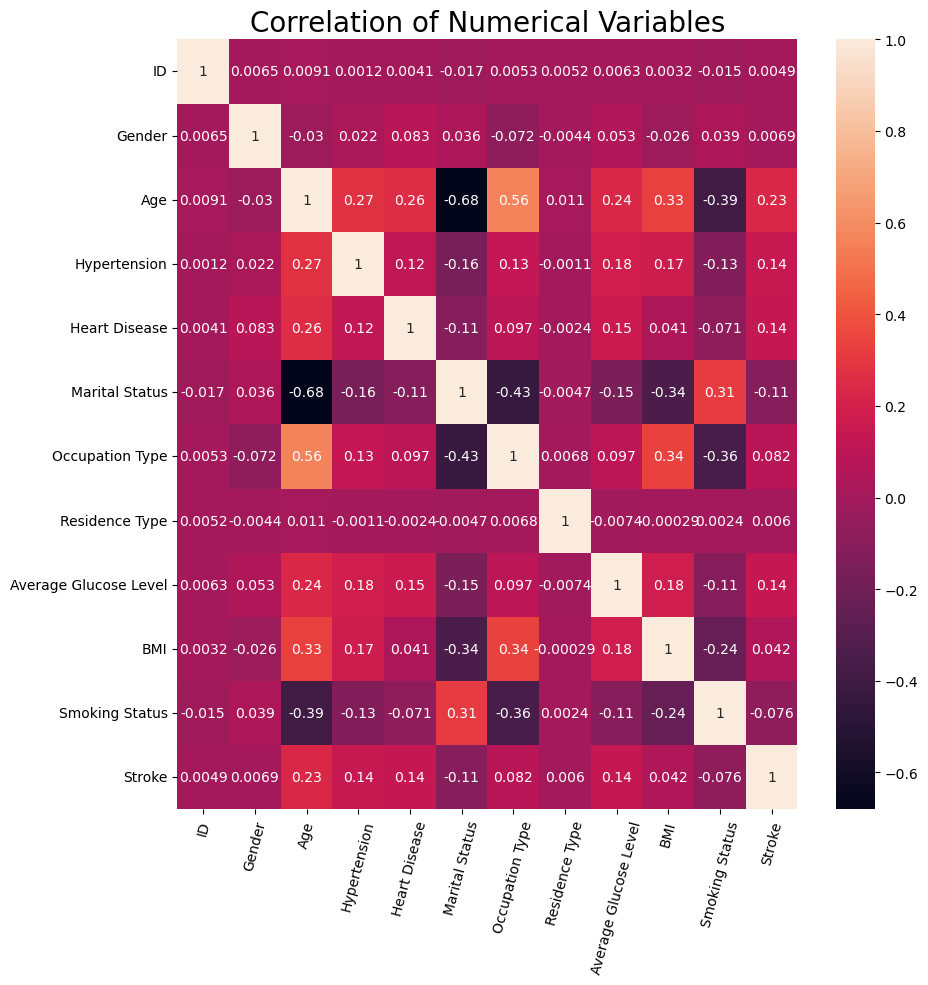

In [30]:


f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), annot = True)
ax.set_title('Correlation of Numerical Variables', fontsize = 20)
plt.xticks(rotation=75, fontsize = 10)
plt.yticks(rotation=0, fontsize = 10)

There is **no strong link** between stroke and other characteristics. A **small positive** occurred between **age and heart disease** with the stroke.

# Data Modeling

In [31]:
# Split the DataFrame into X (the data) and y (the  target variable).
x = data.drop(['Stroke'], axis = 1) # Drop column Stroke
y = data['Stroke']

In [32]:
#Scale data X
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data with train size 80%, test size 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)



In [33]:
print("---------------------X-------------------------------------")
print("Shape of X train data : ",x_train.shape)
print("Shape of X test data : ",x_test.shape)

print()
print("---------------------y-------------------------------------")
print("Shape of y train data : ",y_train.shape)
print("Shape of y test data : ",y_test.shape)


---------------------X-------------------------------------
Shape of X train data :  (3926, 11)
Shape of X test data :  (982, 11)

---------------------y-------------------------------------
Shape of y train data :  (3926,)
Shape of y test data :  (982,)


## Logistic Regression

In [34]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_classfication_report = classification_report(y_test, lr_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("Logistic Regression Accuracy : {:.3f}".format(lr_accuracy))
print("-----------------------------------------------------------------------")
print("\nConfusion Matrix : \n", lr_conf)
print("-----------------------------------------------------------------------")
print("\nClassification Report : \n", lr_classfication_report)

Logistic Regression Accuracy : 0.946
-----------------------------------------------------------------------

Confusion Matrix : 
 [[929   0]
 [ 53   0]]
-----------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



## Decision Tree

In [35]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_conf = confusion_matrix(y_test, dt_pred)
dt_classfication_report = classification_report(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy : {:.3f}".format(dt_accuracy))
print("-----------------------------------------------------------------------")
print("\nConfusion Matrix : \n", dt_conf)
print("-----------------------------------------------------------------------")
print("\nClassification Report : \n", dt_classfication_report)

Decision Tree Accuracy : 0.912
-----------------------------------------------------------------------

Confusion Matrix : 
 [[889  40]
 [ 46   7]]
-----------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       929
           1       0.15      0.13      0.14        53

    accuracy                           0.91       982
   macro avg       0.55      0.54      0.55       982
weighted avg       0.91      0.91      0.91       982



## K Nearest Neighbors

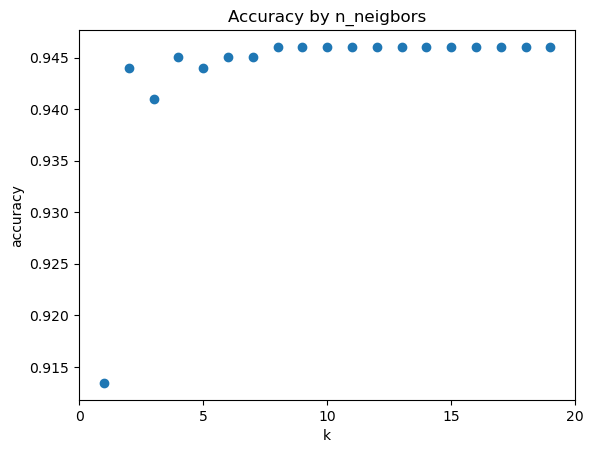

In [36]:
# Determine the best value of n_neighbors, I have choose the value of 10 because of high accuracy compare with others
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [37]:
knn = KNeighborsClassifier(n_neighbors = 10) 
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("KNN Accuracy : {:.3f}".format(knn_accuracy))
print("-----------------------------------------------------------------------")
print("\nConfusion Matrix : \n", knn_conf)
print("-----------------------------------------------------------------------")
print("\nClassification Report : \n", knn_classification_report)

KNN Accuracy : 0.946
-----------------------------------------------------------------------

Confusion Matrix : 
 [[929   0]
 [ 53   0]]
-----------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



## Support Vector Machine

In [38]:
svm = SVC(kernel='rbf', C=1)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

print("SVM Accuracy : {:.3f}".format(svm_accuracy))
print("-----------------------------------------------------------------------")
print("\nConfusion Matrix : \n", svm_conf)
print("-----------------------------------------------------------------------")
print("\nClassification Report : \n", svm_classification_report)

SVM Accuracy : 0.946
-----------------------------------------------------------------------

Confusion Matrix : 
 [[929   0]
 [ 53   0]]
-----------------------------------------------------------------------

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [39]:
# Compare model

print("Logistic Regression Accuracy : {:.3f}".format(lr_accuracy))
print("Decision Tree Accuracy : {:.3f}".format(dt_accuracy))
print("KNN Accuracy : {:.3f}".format(knn_accuracy))
print("SVM Accuracy : {:.3f}".format(svm_accuracy))


Logistic Regression Accuracy : 0.946
Decision Tree Accuracy : 0.912
KNN Accuracy : 0.946
SVM Accuracy : 0.946
